Arbres de décision et Nested Logit 5 boules 2 étoiles

Optimisation de stratégies de jeu : Développer une stratégie de jeu basée sur l'historique des tirages pour maximiser les chances de gagner. Par exemple, déterminer quelles combinaisons de numéros jouer en fonction des résultats antérieurs.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Charger le fichier Excel
file_path = '/content/drive/MyDrive/_Documents/eco/DATA EUROMILLION CHOIX DISCRET.xlsx'
data = pd.read_excel(file_path, sheet_name='DONNEES')

# Supposer que les colonnes sont nommées 'Boule1', 'Boule2', ..., 'Boule5', 'Etoile1', 'Etoile2', 'GAGNANT RANG 1'
features = data[['B1', 'B2', 'B3', 'B4', 'B5', 'E1', 'E2']]
labels = data['GAGNANT RANG 1']  # Cible

# Convertir les labels en catégories binaires - 0 pour pas de gagnant, 1 pour au moins un gagnant
labels = (labels > 0).astype(int)


In [14]:
# Nous allons simuler un DataFrame pour démontrer le code nécessaire.
import pandas as pd
import numpy as np

# Création d'un DataFrame de démonstration avec des valeurs manquantes


# Compter le nombre de lignes avant la suppression
count_before = len(data)
print(f"Nombre de lignes avant suppression : {count_before}")

# Supprimer les lignes avec des valeurs manquantes
data = data.dropna()

# Compter le nombre de lignes après la suppression
count_after = len(data)
print(f"Nombre de lignes après suppression : {count_after}")

# Notez que dans votre cas, vous devrez charger votre propre DataFrame au lieu de créer un nouveau.
# Assurez-vous de remplacer 'df' par le nom de votre DataFrame.

# Ce code est prêt à être exécuté dans votre environnement local.


Nombre de lignes avant suppression : 1685
Nombre de lignes après suppression : 1685


In [34]:
# Calculer le nombre d'occurrences où 'GAGNANT RANG 1' est supérieur ou égal à 1
occurrences_ge_1 = (data['GAGNANT RANG 1'] >= 1).sum()

# Calculer le nombre d'occurrences où 'GAGNANT RANG 1' est égal à 0
occurrences_eq_0 = (data['GAGNANT RANG 1'] == 0).sum()

# Calculer la proportion en divisant les occurrences où 'GAGNANT RANG 1' est >= 1 par les occurrences où 'GAGNANT RANG 1' est égal à 0
proportion = occurrences_ge_1
# Afficher la proportion
print(proportion/1685)


0.24154302670623146


In [9]:
# Diviser les données en un ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=53)

# Créer et entraîner l'arbre de décision
model = DecisionTreeClassifier(random_state=53)
model.fit(X_train, y_train)

# Évaluer le modèle
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du modèle: {accuracy * 100:.2f}%")


Précision du modèle: 62.31%


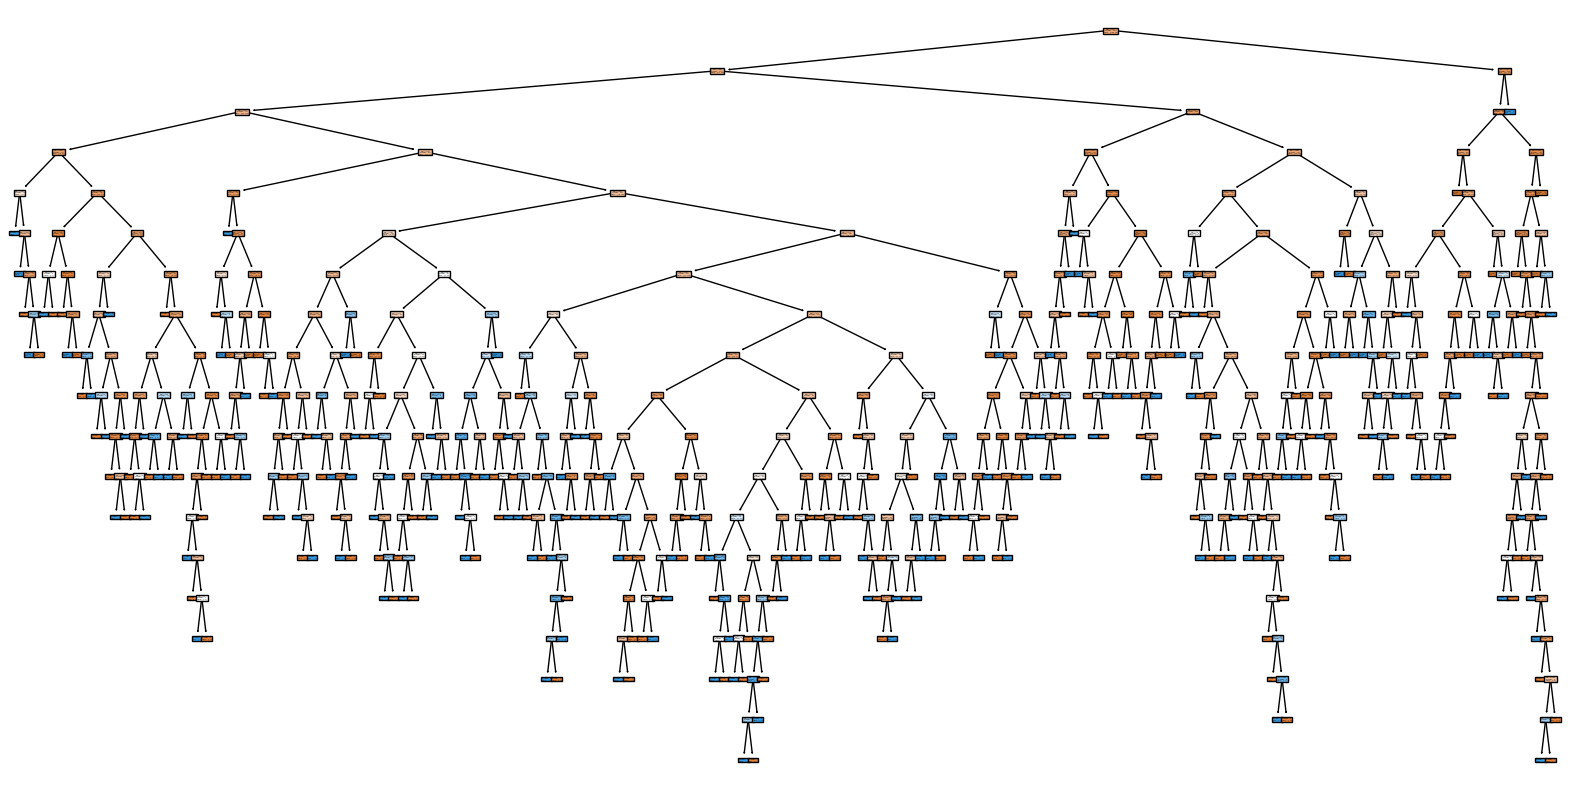

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

# Visualiser l'arbre
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=['Boule1', 'Boule2', 'Boule3', 'Boule4', 'Boule5', 'Etoile1', 'Etoile2'])
plt.show()


In [43]:
# Créer l'arbre de décision en utilisant toutes les données
model = DecisionTreeClassifier(random_state=53)
model.fit(features, labels)

# Visualiser l'arbre
plt.figure(figsize=(200,100))
tree.plot_tree(model, filled=True, feature_names=['Boule1', 'Boule2', 'Boule3', 'Boule4', 'Boule5', 'Etoile1', 'Etoile2'], max_depth=3)
plt.savefig('/content/drive/MyDrive/_Documents/eco/image.png')
plt.show()


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Meilleurs paramètres: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Précision du meilleur modèle: 73.59%


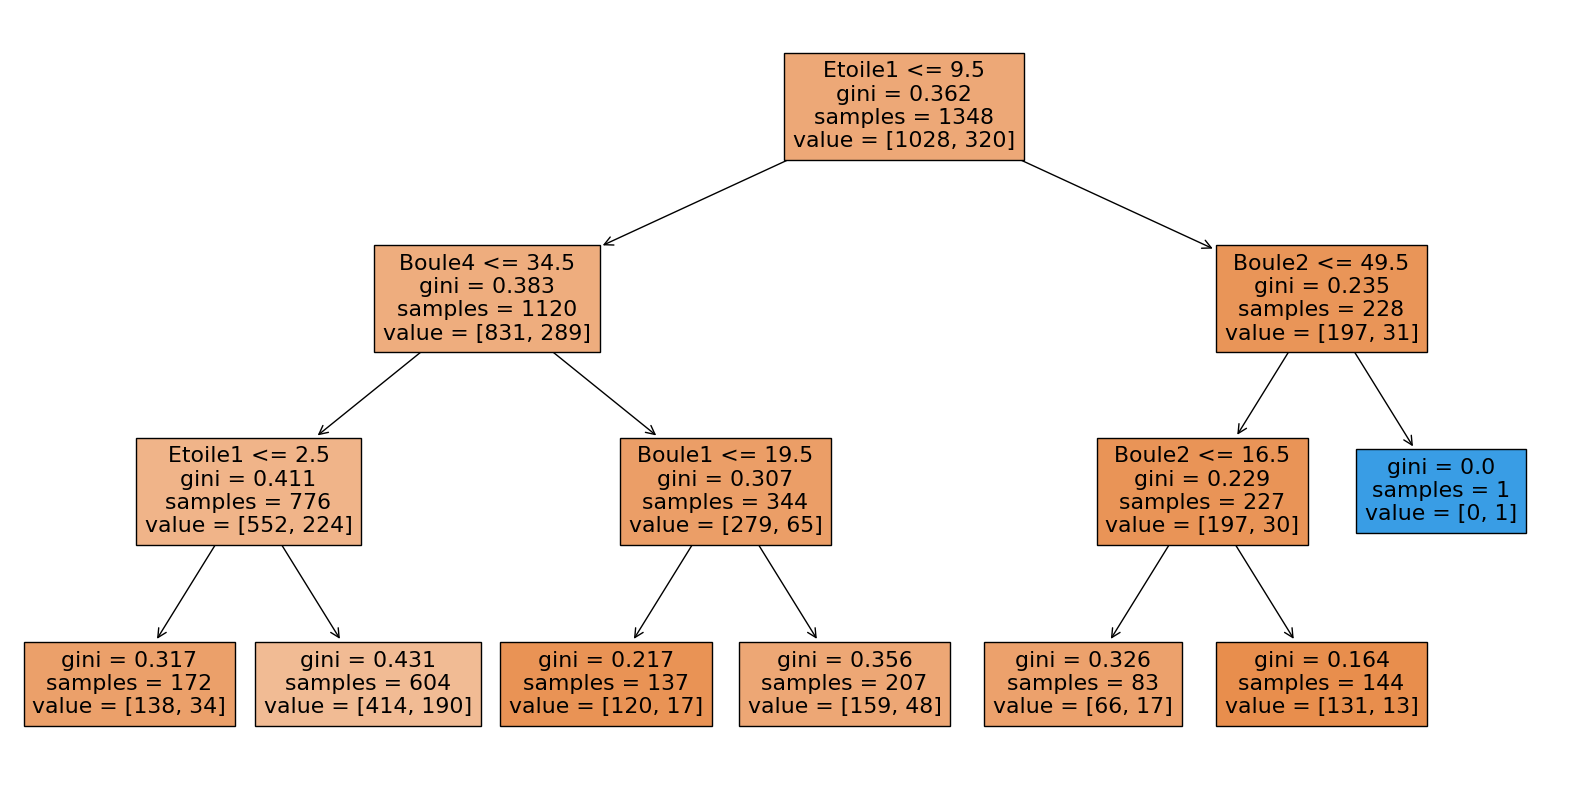

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, make_scorer
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données depuis le fichier Excel précédemment mentionné

# Préparation des variables explicatives et de la variable cible
features = data[['B1', 'B2', 'B3', 'B4', 'B5', 'E1', 'E2']]
labels = (data['GAGNANT RANG 1'] > 0).astype(int)  # Conversion en binaire: 1 pour gagnant, 0 pour non-gagnant

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=53)

# Paramètres pour GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=53),
    param_grid,
    cv=5,
    scoring=make_scorer(accuracy_score),
    verbose=1  # Affiche plus d'informations pendant la recherche
)

# Entraînement
grid_search.fit(X_train, y_train)

# Le meilleur modèle et ses paramètres
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Précision du meilleur modèle sur l'ensemble de test
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Affichage des résultats
print(f"Meilleurs paramètres: {best_params}")
print(f"Précision du meilleur modèle: {accuracy * 100:.2f}%")

# Visualisation de l'arbre de décision
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=['Boule1', 'Boule2', 'Boule3', 'Boule4', 'Boule5', 'Etoile1', 'Etoile2'])
plt.show()


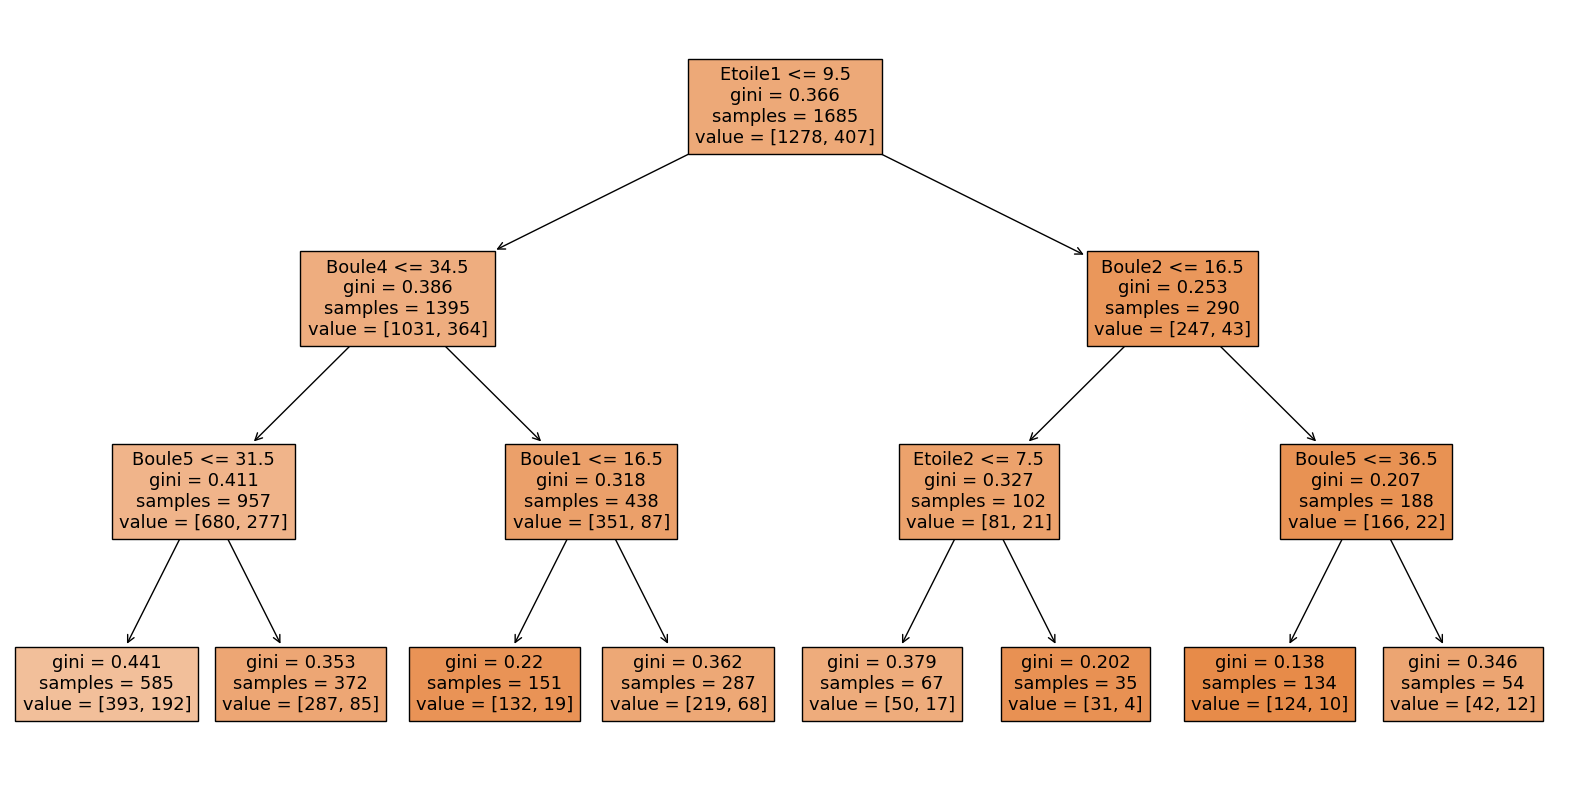

In [51]:
# Créer l'arbre de décision en utilisant toutes les données
model = DecisionTreeClassifier(random_state=53, max_depth=3)
model.fit(features, labels)

# Visualiser l'arbre
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=['Boule1', 'Boule2', 'Boule3', 'Boule4', 'Boule5', 'Etoile1', 'Etoile2'])
plt.show()


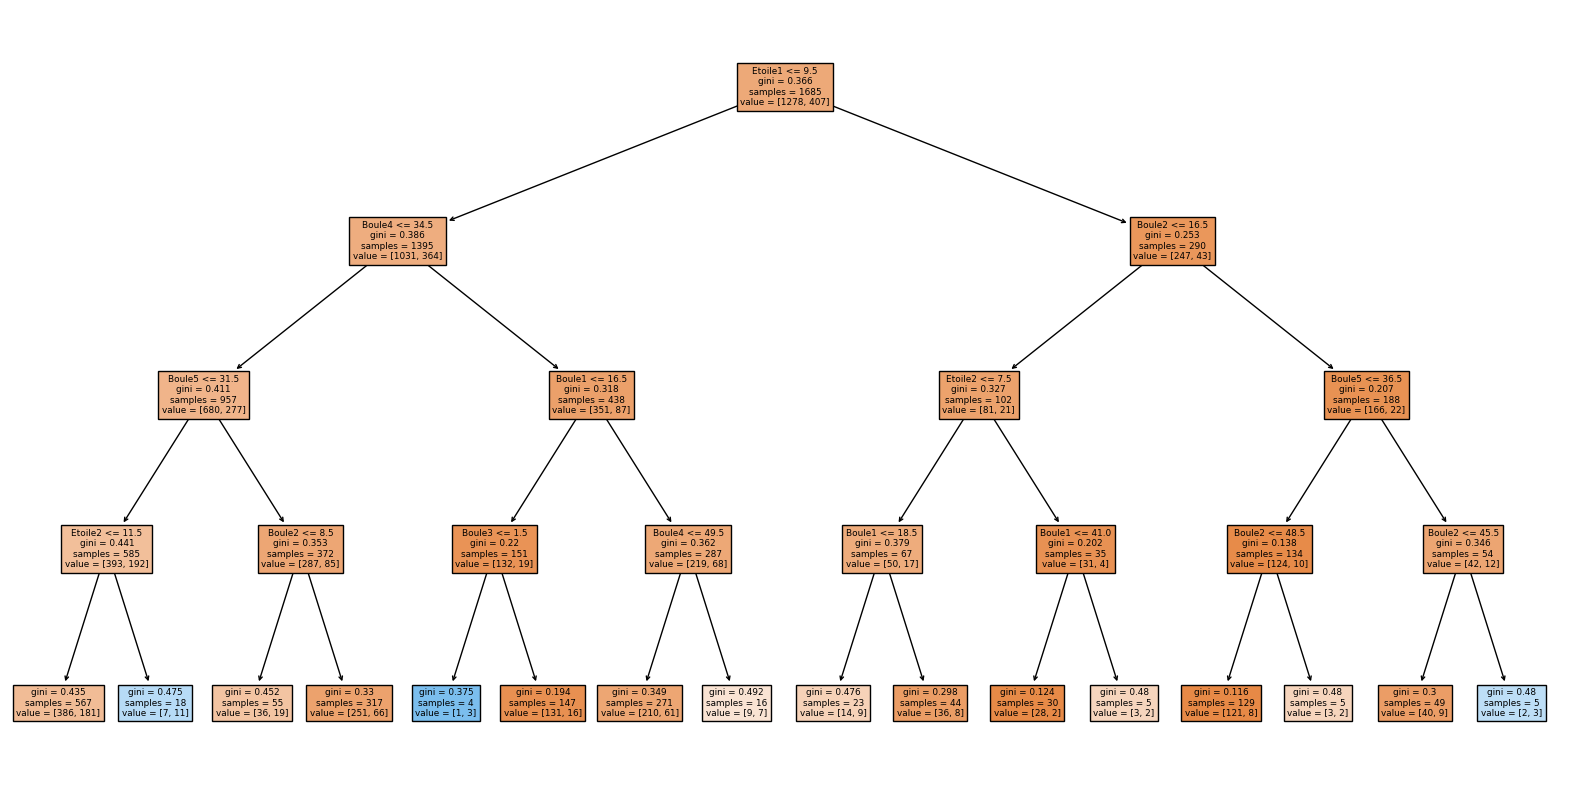

In [52]:
# Créer l'arbre de décision en utilisant toutes les données
model = DecisionTreeClassifier(random_state=53, max_depth=4)
model.fit(features, labels)

# Visualiser l'arbre
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=['Boule1', 'Boule2', 'Boule3', 'Boule4', 'Boule5', 'Etoile1', 'Etoile2'])
plt.show()


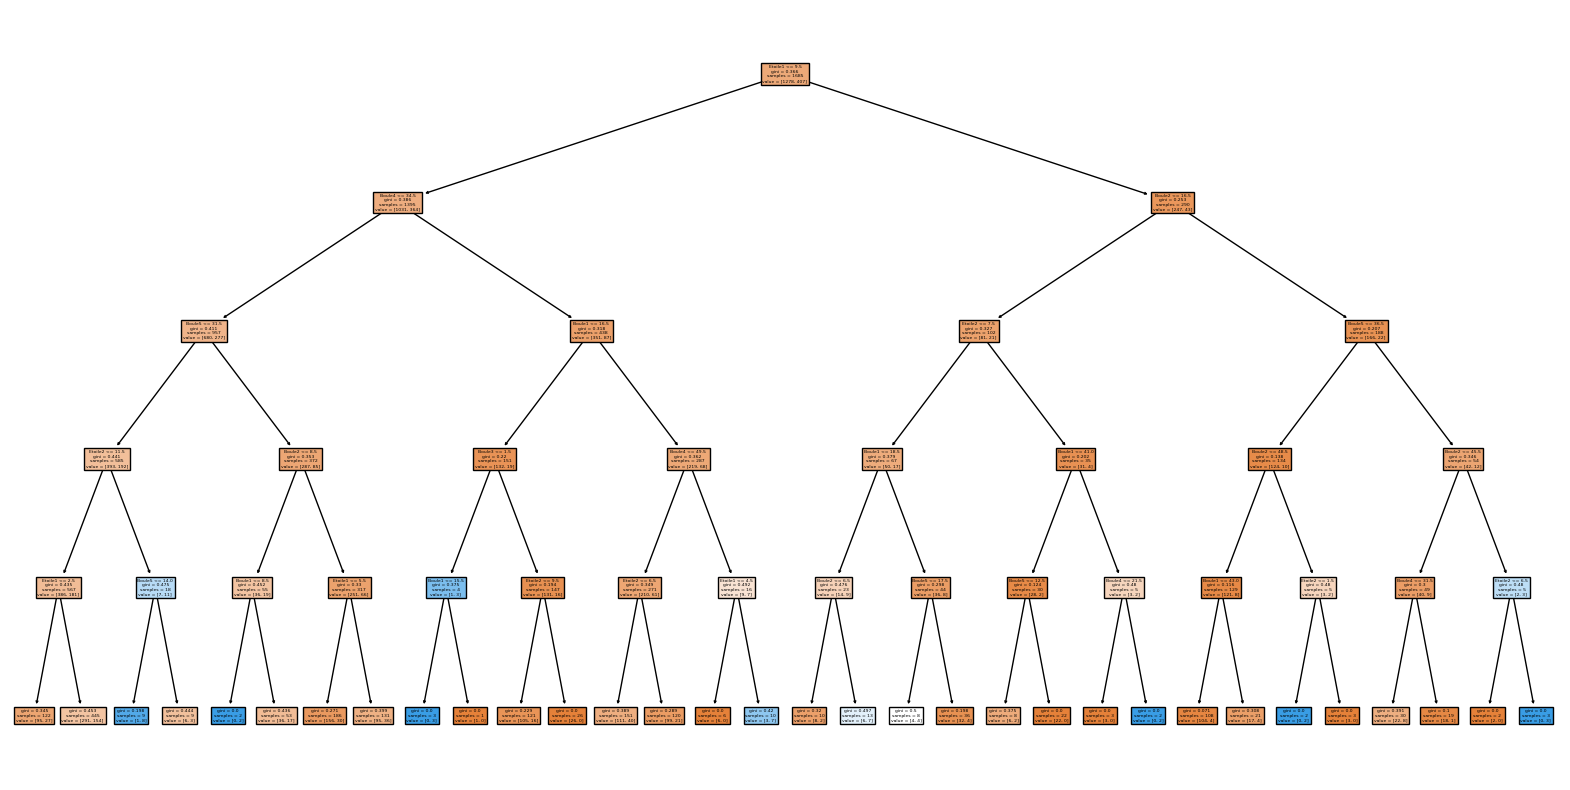

In [50]:
# Créer l'arbre de décision en utilisant toutes les données
model = DecisionTreeClassifier(random_state=53, max_depth=5)
model.fit(features, labels)

# Visualiser l'arbre
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=['Boule1', 'Boule2', 'Boule3', 'Boule4', 'Boule5', 'Etoile1', 'Etoile2'])
plt.show()


---
---

In [30]:
import pandas as pd
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta, DefineVariable
import matplotlib.pyplot as plt

# Charger vos données
file_path = '/content/drive/MyDrive/_Documents/eco/DATA EUROMILLION CHOIX DISCRET.xlsx'

data = pd.read_excel(file_path)

# Supprimer toutes les colonnes non numériques
data_numeric = data.select_dtypes(include=['number'])

# Créer une base de données biogeme
database = db.Database('EuroMillions', data_numeric)

# Définir la variable 'Gagnant' directement dans la base de données
database.data['Gagnant'] = (database.data['GAGNANT RANG 1'] > 0).astype(int)

# Les noms des variables dans le dataframe
boules = ['B1', 'B2', 'B3', 'B4', 'B5']
etoiles = ['E1', 'E2']

# Définir les paramètres Beta pour chaque boule et étoile
betas_boules = [Beta(f'beta_boule{i}', 0, None, None, 0) for i in range(1, 6)]
betas_etoiles = [Beta(f'beta_etoile{i}', 0, None, None, 0) for i in range(1, 3)]

# Fonctions d'utilité pour chaque alternative
V1 = sum([betas_boules[i] * DefineVariable(boules[i], database.data[boules[i]], database) for i in range(5)])
V2 = sum([betas_etoiles[i] * DefineVariable(etoiles[i], database.data[etoiles[i]], database) for i in range(2)])

# Les fonctions d'utilité doivent être définies en tant que dictionnaire
V = {1: V1, 2: V2}

# La colonne de la base de données contenant le choix effectué par les individus
choice = database.data['Gagnant']

# Définition des nids (nests)
nest1_members = [1]  # Supposons que l'alternative 1 appartient au nid 1
nest2_members = [2]  # Supposons que l'alternative 2 appartient au nid 2

# Probabilités conditionnelles pour chaque nid
prob_nest1 = models.logit(V, nest1_members, choice)
prob_nest2 = models.logit(V, nest2_members, choice)

# Les paramètres du nid
alpha_nest1 = Beta('alpha_nest1', 1, None, None, 0)
alpha_nest2 = Beta('alpha_nest2', 1, None, None, 0)

# Probabilités pour le modèle Nested Logit
prob_nested = alpha_nest1 * prob_nest1 + alpha_nest2 * prob_nest2

# Fonction de log-vraisemblance
logprob = models.log(prob_nested)

# Création et estimation du modèle
biogeme = bio.BIOGEME(database, logprob)
results = biogeme.estimate()

# Affichage des résultats
parameters = results.getEstimatedParameters()
print(parameters)

# Tracé des coefficients estimés
plt.figure(figsize=(12, 8))
parameters['Value'].plot(kind='barh')
plt.title('Coefficients estimés du modèle Nested Logit')
plt.xlabel('Valeur du coefficient')
plt.ylabel('Variables')
plt.show()


BiogemeError: ignored

In [53]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import MNLogit

# Charger les données
data = pd.read_excel('/content/drive/MyDrive/_Documents/eco/DATA EUROMILLION CHOIX DISCRET.xlsx')

# Préparation des variables
# Y - Variable dépendante
data['GAGNANT_RANG_1'] = data['GAGNANT RANG 1'].apply(lambda x: 1 if x > 0 else 0)

# X - Variables explicatives
X_base = data[['B1', 'B2', 'B3', 'B4', 'B5', 'E1', 'E2']]

# Calcul des fréquences historiques pour chaque boule et étoile
# (Remarque: Cela nécessite une réflexion supplémentaire pour être précis dans une implémentation réelle)
ball_counts = data[['B1', 'B2', 'B3', 'B4', 'B5']].apply(pd.value_counts).fillna(0)
star_counts = data[['E1', 'E2']].apply(pd.value_counts).fillna(0)
X_freq_balls = data[['B1', 'B2', 'B3', 'B4', 'B5']].applymap(lambda x: ball_counts.loc[x].sum())
X_freq_stars = data[['E1', 'E2']].applymap(lambda x: star_counts.loc[x].sum())

# Calcul de la parité pour chaque boule et étoile
X_parity_balls = X_base[['B1', 'B2', 'B3', 'B4', 'B5']].applymap(lambda x: x % 2)
X_parity_stars = X_base[['E1', 'E2']].applymap(lambda x: x % 2)

# Calcul des statistiques des tirages précédents
mean_balls = data[['B1', 'B2', 'B3', 'B4', 'B5']].mean(axis=1)
std_balls = data[['B1', 'B2', 'B3', 'B4', 'B5']].std(axis=1)
mean_stars = data[['E1', 'E2']].mean(axis=1)
std_stars = data[['E1', 'E2']].std(axis=1)
X_stats = pd.concat([mean_balls, std_balls, mean_stars, std_stars], axis=1)

# Combinaison de toutes les variables explicatives
X = pd.concat([X_base, X_freq_balls, X_freq_stars, X_parity_balls, X_parity_stars, X_stats], axis=1)

# Ajustement du modèle Nested Logit
model = MNLogit(data['GAGNANT_RANG_1'], X)
result = model.fit()

# Affichage d'un résumé des résultats
print(result.summary())


         Current function value: 0.542272
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:         GAGNANT_RANG_1   No. Observations:                 1685
Model:                        MNLogit   Df Residuals:                     1662
Method:                           MLE   Df Model:                           22
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                 0.01914
Time:                        15:24:52   Log-Likelihood:                -913.73
converged:                      False   LL-Null:                       -931.56
Covariance Type:            nonrobust   LLR p-value:                   0.03306
GAGNANT_RANG_1=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
B1                   0.0043        nan        nan        nan         nan         nan
B2                  -0.0039        nan        n

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:5475: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))
